In [45]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Rescaling
import matplotlib.pyplot as plt

In [46]:
# ---------- model setup ----------
# path of imaging data
path = "/content/archive"
# 64 x 64 pixels
height = 64
width = 64
batch = 32
random_seed = 42

print(f"Loading data from: {path}", )

Loading data from: /content/archive


In [47]:
# ---------- get training data ----------
# for training, we will utilize 80% of data
training_data = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    # save 20% for validation
    validation_split = 0.2,
    # this is the training split
    subset="training",
    seed = random_seed,
    image_size=(height, width),
    batch_size = batch
)

Found 58954 files belonging to 6 classes.
Using 47164 files for training.


In [48]:
# ----------- get validation data ----------
validation_data = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    # save 20% for validation
    validation_split = 0.2,
    # this is the validation split
    subset="validation",
    seed = random_seed,
    image_size=(height, width),
    batch_size = batch
)
class_names = training_data.class_names
num_classes = len(class_names)
print(f'classes {class_names}')

Found 58954 files belonging to 6 classes.
Using 11790 files for validation.
classes ['AbdomenCT', 'BreastMRI', 'CXR', 'ChestCT', 'Hand', 'HeadCT']


In [49]:
# ---------- build model ----------
# add layers one by one with sequential
model = Sequential()
# normalize pixels
model.add(Rescaling(1./255, input_shape=(height, width, 3)))

# check data
for images, labels in training_data.take(1):
    print(f'image shape {images.shape}')
    print(f'label shape {labels.shape}')
    print(f'first 5 labels {labels[:5].numpy()}')

# 3 convolution layers
for i in range(3):
    # kernel size
    k_size = (3, 3)
    model.add(Conv2D(64, k_size, activation='relu'))
    model.add(MaxPooling2D())

# flatten before adding dense layers
model.add(Flatten())

# connected layer
model.add(Dense(128, activation='relu'))
# dropout technique helps prevent overfitting
model.add(Dropout(0.3))
# output layer
model.add(Dense(num_classes, activation='softmax'))
model.summary()

image shape (32, 64, 64, 3)
label shape (32,)
first 5 labels [5 0 1 1 5]


/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_10 (Rescaling)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 62, 62, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 29, 29, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371,462 (1.42 MB)

 Trainable params: 371,462 (1.42 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
# ----------- compile ----------
model.compile(
    optimizer= 'adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [51]:
# ---------- training -----------
print("Training...")
tracker = model.fit(
    training_data,
    validation_data = validation_data,
    epochs=6
)

Training...
Epoch 1/6
1474/1474 ━━━━━━━━━━━━━━━━━━━━ 497s 336ms/step - accuracy: 0.9355 - loss: 0.1800 - val_accuracy: 0.9947 - val_loss: 0.0176
Epoch 2/6
1474/1474 ━━━━━━━━━━━━━━━━━━━━ 493s 330ms/step - accuracy: 0.9943 - loss: 0.0185 - val_accuracy: 0.9973 - val_loss: 0.0089
Epoch 3/6
1474/1474 ━━━━━━━━━━━━━━━━━━━━ 483s 317ms/step - accuracy: 0.9974 - loss: 0.0074 - val_accuracy: 0.9968 - val_loss: 0.0101
Epoch 4/6
1474/1474 ━━━━━━━━━━━━━━━━━━━━ 522s 331ms/step - accuracy: 0.9981 - loss: 0.0067 - val_accuracy: 0.9984 - val_loss: 0.0048
Epoch 5/6
1474/1474 ━━━━━━━━━━━━━━━━━━━━ 497s 328ms/step - accuracy: 0.9984 - loss: 0.0052 - val_accuracy: 0.9986 - val_loss: 0.0046
Epoch 6/6
1474/1474 ━━━━━━━━━━━━━━━━━━━━ 469s 318ms/step - accuracy: 0.9989 - loss: 0.0037 - val_accuracy: 0.9953 - val_loss: 0.0267


In [52]:
# ---------- model accuracy ----------
mod_acc = tracker.history['accuracy']
val_acc = tracker.history['val_accuracy']
loss = tracker.history['loss']
val_loss = tracker.history['val_loss']
epoch_range = range(len(mod_acc))

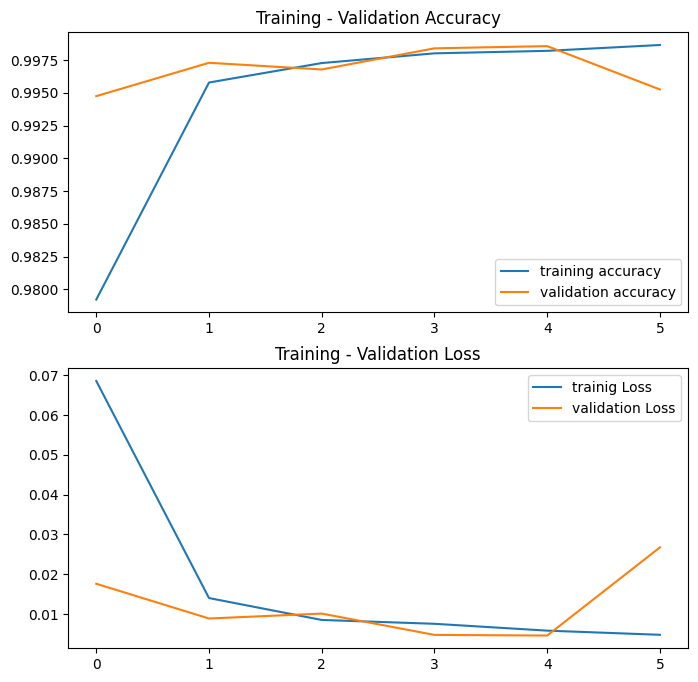

In [53]:
# ---------- plot ----------
plt.figure(figsize=(8,8))
# accuracy visual
plt.subplot(2, 1, 1)
plt.plot(epoch_range, mod_acc, label='training accuracy')
plt.plot(epoch_range, val_acc, label='validation accuracy')
plt.legend(loc='lower right')
plt.title("Training - Validation Accuracy")
# loss visual
# Loss Plot
plt.subplot(2, 1, 2)
plt.plot(epoch_range, loss, label='trainig Loss')
plt.plot(epoch_range, val_loss, label='validation Loss')
plt.legend(loc='upper right')
plt.title('Training - Validation Loss')

plt.show()